In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [2]:
# Upload your kaggle.json API information here (you can get this from my GitHub folder, just replace your username and key)

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"thedbguy","key":"3dca6b34f878a254d7e6213655480010"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d stackoverflow/stack-overflow-2018-developer-survey
!ls # You should see stack-overflow-2018-developer-survey.zip in the resulting list

 97% 19.0M/19.6M [00:00<00:00, 25.7MB/s]
100% 19.6M/19.6M [00:00<00:00, 28.7MB/s]
kaggle.json  sample_data  stack-overflow-2018-developer-survey.zip


In [5]:
import pandas as pd

from zipfile import ZipFile
zip_file = ZipFile('/content/stack-overflow-2018-developer-survey.zip')
data=pd.read_csv(zip_file.open('survey_results_public.csv'))
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder

In [120]:
# Explore Job Satisfaction
data["JobSatisfaction"].value_counts()

Moderately satisfied                  26005
Extremely satisfied                   12436
Slightly satisfied                    10012
Slightly dissatisfied                  7057
Moderately dissatisfied                6318
Neither satisfied nor dissatisfied     4966
Extremely dissatisfied                 2482
Name: JobSatisfaction, dtype: int64

In [101]:
# What's our NA situation with each column?

# From https://stackoverflow.com/questions/37366717/pandas-print-column-name-with-missing-values
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(data)

Your selected dataframe has 907 columns and 21236 Rows.
There are 121 columns that have missing values.


,Zero Values,Missing Values,% of Total Values,Total Zero Missing Values,% Total Zero Missing Values,Data Type
TimeAfterBootcamp,0,19394,91.3,19394,91.3,object
MilitaryUS,0,16267,76.6,16267,76.6,object
HackathonReasons,0,14255,67.1,14255,67.1,object
ErgonomicDevices,0,12041,56.7,12041,56.7,object
AdBlockerReasons,0,11937,56.2,11937,56.2,object
StackOverflowJobsRecommend,0,10937,51.5,10937,51.5,object
JobEmailPriorities1,0,10879,51.2,10879,51.2,float64
JobEmailPriorities2,0,10879,51.2,10879,51.2,float64
JobEmailPriorities3,0,10879,51.2,10879,51.2,float64
JobEmailPriorities4,0,10879,51.2,10879,51.2,float64


In [0]:
# There are a number of multi-value columns that need to be separated into their own columns. For instance, "LanguagesWorkedWith" might contain the following
# values: JavaScript;Python;HTML;CSS
#
# We need to split these into their own columns so that we can analyze them.
import numpy as np

# Removed features with very high NA's
categorical_features = ['LanguageWorkedWith', 'LanguageDesireNextYear', 
                        'IDE', 'VersionControl', 'Hobby', 'OpenSource', 'Student', 'FormalEducation', 'UndergradMajor', 
                        'CompanySize', 'DevType', 'YearsCoding',
                        'YearsCodingProf', 'LastNewJob', 'CommunicationTools', 'TimeFullyProductive', 
                        'EducationTypes', 'AgreeDisagree1',	'AgreeDisagree2', 'AgreeDisagree3',
                        'OperatingSystem','NumberMonitors', 'CheckInCode', 'AIDangerous', 'AIFuture', 
                        'EthicsChoice', 'EthicsReport', 'EthicalImplications', 
                        'HypotheticalTools1', 'HypotheticalTools2', 'HypotheticalTools3', 'HypotheticalTools4', 
                        'HypotheticalTools5', 'WakeTime', 'HoursComputer', 'HoursOutside', 'SkipMeals', 'Exercise', 
                        'Age', 'SurveyTooLong', 'SurveyEasy', 'Employment', 'HopeFiveYears', 
                        'Gender']

# Filter Data
data = data[(data['JobSatisfaction'] == 'Extremely satisfied') | (data['JobSatisfaction'] == 'Extremely dissatisfied') | (data['JobSatisfaction'] == 'Moderately dissatisfied')]

# Add Target Variable
targets = ['Extremely satisfied']
data['JobSatisfactionTarget'] = np.where(np.in1d(data['JobSatisfaction'], targets), 1, 0)    

# Encode categorical features so that they're numeric.
for feature in categorical_features: 
    exploded = data[feature].str.get_dummies(sep=';').rename(lambda x: feature + '_' + x, axis='columns') 
    data = pd.concat([data, exploded], axis = 1)

In [165]:
data['JobSatisfactionTarget'].value_counts()

1    38441
0     8800
Name: JobSatisfactionTarget, dtype: int64

In [73]:
data.columns

Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'RaceEthnicity_White or of European descent', 'Gender_Female',
       'Gender_Male',
       'Gender_Non-binary, genderqueer, or gender non-conforming',
       'Gender_Transgender', 'LastNewJob_Between 1 and 2 years ago',
       'LastNewJob_Between 2 and 4 years ago',
       'LastNewJob_I've never had a job', 'LastNewJob_Less than a year ago',
       'LastNewJob_More than 4 years ago'],
      dtype='object', length=907)

In [0]:
# Pipeline Definition
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

numeric_features = ['ConvertedSalary', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 
                    'AssessJob9', 'AssessJob10',	'AssessBenefits1',	'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5',	 
                    'AssessBenefits6', 'AssessBenefits7',	'AssessBenefits8', 'AssessBenefits9',	 'AssessBenefits10', 'AssessBenefits11']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

encoded_features = []

for column in data:
    for feature in categorical_features:
      if (feature in column):
        encoded_features.append(column)
        break

encoded_features = [x for x in encoded_features if x not in categorical_features]   

# These are the features with the best correlation (positive or negative to target variable)
encoded_features = [
'HopeFiveYears_Doing the same work',
"HopeFiveYears_Working in a different or more specialized technical role than the one I'm in now",
'HypotheticalTools4_Not at all interested',
'HopeFiveYears_Working in a career completely unrelated to software development',
'CommunicationTools_Slack',
'CheckInCode_Multiple times per day',
'EducationTypes_Contributed to open source software',
'AgreeDisagree1_Strongly agree',
'DevType_C-suite executive (CEO, CTO, etc.)',
'HypotheticalTools5_Not at all interested',
'HypotheticalTools4_Extremely interested',
'LastNewJob_Less than a year ago',
'AgreeDisagree1_Disagree',
'OpenSource_No',
'OpenSource_Yes',
'HypotheticalTools5_Extremely interested',
'Employment_Independent contractor, freelancer, or self-employed',
'AgreeDisagree1_Neither Agree nor Disagree',
'EducationTypes_Received on-the-job training in software development',
'OperatingSystem_MacOS'
]

all_features = numeric_features + encoded_features        

# Drop features that are not being used
for column in data.columns:
  if (column in all_features or column == 'JobSatisfactionTarget'):
    continue
  
  data.drop(column, axis=1, inplace=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, all_features)])


In [58]:
# Feature selection with all_features:
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table


# 1) Features with a high number of missing values.
missing_zero_values_table(data)      
data.shape

# 2) What are the feature correlations?
corr_matrix = data.corr()
corr_matrix['JobSatisfactionTarget'].abs().sort_values(ascending=False)[:21]   # Top 2 by absolute value (21 because not counting target var)

Your selected dataframe has 43 columns and 21236 Rows.
There are 22 columns that have missing values.


JobSatisfactionTarget                                                                              1.000000
HopeFiveYears_Doing the same work                                                                  0.214776
HopeFiveYears_Working in a different or more specialized technical role than the one I'm in now    0.150221
HypotheticalTools4_Not at all interested                                                           0.100407
HopeFiveYears_Working in a career completely unrelated to software development                     0.094395
CommunicationTools_Slack                                                                           0.093661
CheckInCode_Multiple times per day                                                                 0.092261
EducationTypes_Contributed to open source software                                                 0.090728
AgreeDisagree1_Strongly agree                                                                      0.089490
DevType_C-suite executive (C

In [0]:
# Create Train Test Set with Target Variable Transformation
from sklearn.model_selection import train_test_split

X = data.drop('JobSatisfactionTarget', axis=1)
y = data['JobSatisfactionTarget']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [60]:
X.columns

Index(['AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5',
       'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10',
       'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3',
       'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6',
       'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9',
       'AssessBenefits10', 'AssessBenefits11', 'ConvertedSalary',
       'OpenSource_No', 'OpenSource_Yes',
       'DevType_C-suite executive (CEO, CTO, etc.)',
       'LastNewJob_Less than a year ago', 'CommunicationTools_Slack',
       'EducationTypes_Contributed to open source software',
       'EducationTypes_Received on-the-job training in software development',
       'AgreeDisagree1_Disagree', 'AgreeDisagree1_Neither Agree nor Disagree',
       'AgreeDisagree1_Strongly agree', 'OperatingSystem_MacOS',
       'CheckInCode_Multiple times per day',
       'HypotheticalTools4_Extremely interested',
       'HypotheticalTools4_Not at all intere

In [121]:
# Logistic (Softmax Regression)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(solver='lbfgs'))])

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

# Confusion Matrix to see how well we did.
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)


model score: 0.665
Accuracy: 0.665490
Precision: 0.690476
Recall: 0.779382


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
model score: 0.622
Accuracy: 0.622411
Precision: 0.645690
Recall: 0.790213


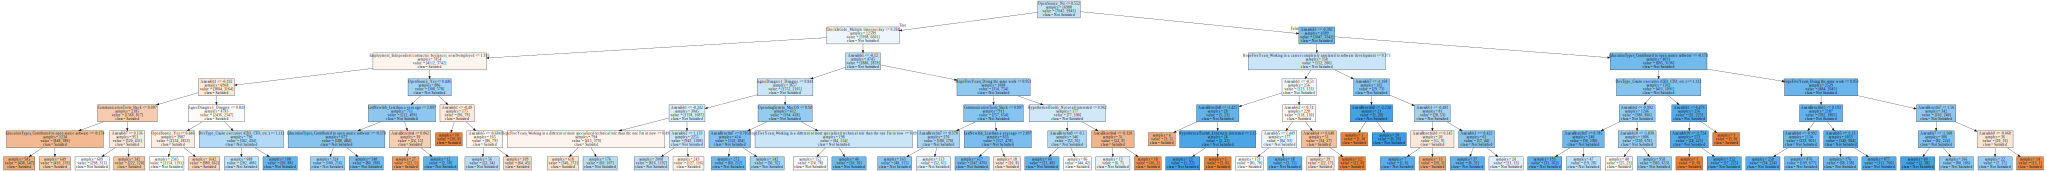

In [118]:
!apt-get install graphviz

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import graphviz

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_split=12))])

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

# Confusion Matrix to see how well we did.
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

from sklearn.tree import export_graphviz
export_graphviz(clf.steps[1][1], out_file="tree.dot", class_names=["Satisifed", "Not Satisified"], feature_names=X_test.columns, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [68]:
# Random Forest Grid Search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [10, 12, 15, 18, 20]
max_features = ['auto', 'sqrt', 'log2', 0.3, 0.4, 0.2]
max_features.append(None)
max_depth = [5, 6, 7, 8, 9, 10]
max_depth.append(None)
bootstrap = [True, False]
min_samples_split = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf_random)])

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

clf.steps[1][1].best_params_

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.5s finished


model score: 0.658


{'bootstrap': False,
 'max_depth': 8,
 'max_features': 0.2,
 'min_samples_split': 10,
 'n_estimators': 15}

In [0]:
clf.steps[1][1].best_params_

{'bootstrap': True,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 12,
 'n_estimators': 20}

In [9]:
# Random Forest with Best Params
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=20, max_features=0.3, max_depth=8, min_samples_split=12, bootstrap=True, random_state=42)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', rf)])

clf.fit(X_train, y_train)

# Confusion Matrix to see how well we did.
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))

# accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

[[ 773  982]
 [ 439 2054]]
Accuracy: 0.665490
Precision: 0.676548
Recall: 0.823907


In [86]:
# Most Important Features

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, clf.steps[1][1].feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending=False)

,Gini-importance
OpenSource_No,0.196986
AssessJob1,0.081032
OpenSource_Yes,0.064324
CheckInCode_Multiple times per day,0.056435
LastNewJob_Less than a year ago,0.029251
AssessJob7,0.025188
CommunicationTools_Slack,0.025012
"Employment_Independent contractor, freelancer, or self-employed",0.023976
"DevType_C-suite executive (CEO, CTO, etc.)",0.021972
AssessBenefits11,0.021851


In [0]:
# Save Model to be used in "Production"
import pickle

output = open('stackoverflow.pkl', 'wb')

pickle.dump(clf, output)